In [1]:
# julia version of stability lp tester

using JuMP
using Ipopt
using Plots

function run_trial(m,w)

    # Define the LP model
    model = Model(Ipopt.Optimizer)

    alpha = 100 * minimum(w) # UPDATE THIS
    B = alpha / log(m)


    @variable(model, x[1:m] >= 0)

    @constraint(model, sum(x) >= 1)

    # the following function takes a vector of variables, x, and a vector
    # of nonnegative weights, w, and returns the weighted entropy, defined to be
    # sum w_i x_i log(1 / w_i x_i)
    function entropy(x, w)
        return sum([w[i] * x[i] * log(alpha / (w[i] * x[i])) / alpha for i in 1:length(x)])
    end

    function set_cover_objective(x,w)
        return sum([w[i] * x[i] for i in 1:length(x)])
    end

    @constraint(model, set_cover_objective(x, w) <= alpha)

    # Define the objective function
    @objective(model, Max, set_cover_objective(x, w) - B * entropy(x, w))

    # Solve the LP problem
    optimize!(model)

    return value(x[1]),x
end

function delta_scale(m)
    return 1
end

delta0 = 0.001 

ms = 10:10:100

unif(m) = [1/m for i in 1:m]
function perturbed(m)
    w = unif(m)
    w[1] -= delta0 / delta_scale(m)
    return w
end

results0 = fill((0, 0.0), length(ms))
Threads.@threads for m in ms
    i = findfirst(x->x==m, ms)
    results0[i] = (m, abs(run_trial(m, unif(m))[1] - run_trial(m, perturbed(m))[1]) / (delta0 / delta_scale(m)))
end


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       20
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:       10
                     variables with only lower bounds:       10
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

In [2]:
delta0 = 0.001 

ms = 15:10:95

unif(m) = [1/m for i in 1:m]
function perturbed(m)
    w = unif(m)
    w[1] -= delta0 / delta_scale(m)
    return w
end

results = fill((0, 0.0), length(ms))
Threads.@threads for m in ms
    i = findfirst(x->x==m, ms)
    results[i] = (m, abs(run_trial(m, unif(m))[1] - run_trial(m, perturbed(m))[1]) / (delta0 / delta_scale(m)))
end

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:       15
                     variables with only lower bounds:       15
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -2.4010946e-02 8.50e-01 1.80e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

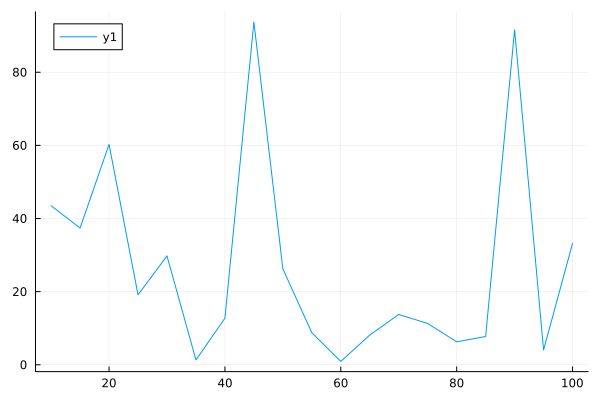

In [3]:
resultsfinal = [results0; results]
sort!(resultsfinal, by = x -> x[1])

plot!(resultsfinal)

In [11]:
function variable_perturbed(m, delta)
    w = unif(m)
    w[1] -= delta
    return w
end

function delta_scaling_trial()
    m = 90
    deltas = 10:10:100
    delta_multiplier = 0.00001
    results = []
    for delta in deltas
        change = abs(run_trial(m, unif(m))[1] - run_trial(m, variable_perturbed(m, delta*delta_multiplier))[1])
        push!(results, change)
    end
    return results
end

Plots.CURRENT_PLOT.nullableplot = nothing
tmp = delta_scaling_trial()
plot!((10:10:100)*0.00001, tmp)

Excessive output truncated after 529653 bytes.

UndefVarError: UndefVarError: `deltas` not defined